# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load Dataset 

In [2]:
df = pd.read_csv('loan_customer.csv')

In [3]:
#informasi general tentang dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

Pengamatan : 
 1. Data terdiri dari 621 baris 
 2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null < jumlah baris)

# Cuplikan Data 

In [4]:
# 5 baris teratas dari data 
df.head(5)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [5]:
# 5 baris acak dari data 
df.sample(5)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
144,LP001507,1984-03-29,6.281195e+11,Male,Yes,0,Graduate,No,2698.0,2034.0,122000,360,30,1.0,yes,apartment,APPROVE
65,LP001225,1982-10-27,6.285630e+11,Male,Yes,0,Graduate,No,5726.0,4595.0,258000,360,30,1.0,NaN,apartment,REJECT
591,LP002916,1987-04-15,6.281143e+11,Male,Yes,0,Graduate,No,2297.0,1522.0,104000,360,30,1.0,yes,house,APPROVE
482,LP002530,NaN,NaN,NaN,Yes,2,Graduate,No,2873.0,1872.0,132000,360,30,0.0,NaN,apartment,REJECT
350,LP002131,1980-05-19,6.287752e+11,Male,Yes,2,Not Graduate,No,3083.0,2168.0,126000,360,30,1.0,NaN,house,APPROVE


In [6]:
# pengelompkkan kolom berdasarkan jenisnya 
nums = ['phone_number','applicant_income','coapplicant_income','loan_amount','loan_term_month','loan_term_year','credit_history']
cats = ['loan_id','birth_date','gender','married','dependents','education','self_employed','has_credit_card','property_type','loan_status']

# Missing Data 

In [7]:
# jumlah entry NULL di setiap kolom 
df.isna().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [8]:
# drop baris dengan missing values
df = df.dropna()

In [9]:
# cek apakah sudah berhasil 
df.isna().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64

In [10]:
# 5 baris teratas dari data 
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
12,LP001028,1987-11-16,6.281128e+11,Male,Yes,2,Graduate,No,3073.0,8106.0,200000,360,30,1.0,no,house,APPROVE
21,LP001046,1984-06-25,6.285219e+11,Male,Yes,1,Graduate,No,5955.0,5625.0,315000,360,30,1.0,no,house,APPROVE
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT
31,LP001095,1983-09-21,6.281348e+11,Male,No,0,Graduate,No,3167.0,0.0,74000,360,30,1.0,yes,house,REJECT
43,LP001131,1986-11-09,6.287723e+10,Male,Yes,0,Graduate,No,3941.0,2336.0,134000,360,30,1.0,no,apartment,APPROVE
47,LP001144,1984-08-31,6.285642e+11,Male,Yes,0,Graduate,No,5821.0,0.0,144000,360,30,1.0,yes,house,APPROVE
72,LP001248,1986-06-07,6.281149e+11,Male,No,0,Graduate,No,3500.0,0.0,81000,300,25,1.0,no,apartment,APPROVE
75,LP001255,1980-07-12,6.285211e+11,Male,No,0,Graduate,No,3750.0,0.0,113000,480,40,1.0,yes,house,REJECT


# Duplicated Data 

In [11]:
# cek jumlah duplicated rows 
# dari semua kolom 
df.duplicated().sum()

0

Pengamatan :
1. Tidak ada duplicated rows/ baris yang terduplikasi (ganda)

# Outliers Removal 

Menggunakan konsep IQR
- Contoh outliers misalnya nilai mahasiswa dalam satu kelas berkisar antara 60 sampai 100, namun ada satu mahasiswa yang nilainya 5. Nah, nilai 5 ini dianggap sebagai outliers karena tentunya akan mempengaruhi statistik data seperti mean alias nilai rata-rata kelas. Oleh sebab itu, biasanya data yang mengandung outliers akan dihapus.

In [12]:
print (f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in ['applicant_income','coapplicant_income','loan_amount',
 'loan_term_month','loan_term_year','credit_history',]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1 - 1.5*IQR
    high_limit = Q3 + 1.5*IQR
    df = df[(df[col]>= low_limit) & (df[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 52
Jumlah baris setelah memfilter outlier: 35


In [13]:
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,1989-02-05,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,1978-11-21,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT
31,LP001095,1983-09-21,6.281348e+11,Male,No,0,Graduate,No,3167.0,0.0,74000,360,30,1.0,yes,house,REJECT
43,LP001131,1986-11-09,6.287723e+10,Male,Yes,0,Graduate,No,3941.0,2336.0,134000,360,30,1.0,no,apartment,APPROVE
47,LP001144,1984-08-31,6.285642e+11,Male,Yes,0,Graduate,No,5821.0,0.0,144000,360,30,1.0,yes,house,APPROVE
81,LP001266,1984-08-05,6.285708e+11,Male,Yes,1,Graduate,Yes,2395.0,0.0,99000,360,30,1.0,no,apartment,APPROVE
90,LP001310,1987-10-18,6.281310e+11,Male,Yes,0,Graduate,No,5695.0,4167.0,175000,360,30,1.0,no,apartment,APPROVE
93,LP001319,1985-04-18,6.281135e+11,Male,Yes,2,Not Graduate,No,3273.0,1820.0,81000,360,30,1.0,no,house,APPROVE
114,LP001392,1986-03-28,6.285210e+10,Female,No,1,Graduate,Yes,7451.0,0.0,126000,360,30,1.0,no,apartment,APPROVE


# Feature Encoding 

In [14]:
# pengecekan nilai/entri dari kolom-kolom kategorikal

for col in cats:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10,'\n')

value counts of column loan_id
LP001068    1
LP002345    1
LP002082    1
LP002119    1
LP002126    1
LP002160    1
LP002250    1
LP002337    1
LP002377    1
LP001953    1
LP002407    1
LP002494    1
LP002536    1
LP002683    1
LP002892    1
LP002916    1
LP001990    1
LP001872    1
LP001073    1
LP001319    1
LP001086    1
LP001095    1
LP001131    1
LP001144    1
LP001266    1
LP001310    1
LP001392    1
LP001807    1
LP001507    1
LP001514    1
LP001692    1
LP001698    1
LP001699    1
LP001720    1
LP002961    1
Name: loan_id, dtype: int64
------------------------------ 

value counts of column birth_date
1986-09-10    1
1981-08-16    1
1989-01-24    1
1986-10-07    1
1985-08-02    1
1990-11-27    1
1984-06-23    1
1982-06-30    1
1985-05-31    1
1988-03-21    1
1981-08-22    1
1990-08-07    1
1988-08-22    1
1976-11-04    1
1983-06-24    1
1987-04-15    1
1980-08-03    1
1985-02-14    1
1989-02-05    1
1985-04-18    1
1978-11-21    1
1983-09-21    1
1986-11-09    1
1984-08-31    1


In [15]:
#melihat jumlah kolom dan baris pada data frame
df.shape

(35, 17)

In [16]:
df.loan_id.value_counts()

LP001068    1
LP002345    1
LP002082    1
LP002119    1
LP002126    1
LP002160    1
LP002250    1
LP002337    1
LP002377    1
LP001953    1
LP002407    1
LP002494    1
LP002536    1
LP002683    1
LP002892    1
LP002916    1
LP001990    1
LP001872    1
LP001073    1
LP001319    1
LP001086    1
LP001095    1
LP001131    1
LP001144    1
LP001266    1
LP001310    1
LP001392    1
LP001807    1
LP001507    1
LP001514    1
LP001692    1
LP001698    1
LP001699    1
LP001720    1
LP002961    1
Name: loan_id, dtype: int64

In [17]:
count_row = df.shape[0]  
print (count_row)
 

35


Pengamatan :
1. jumlah loan_id = jumlah baris data frame, sehingga loan_id tidak perlu dilakukan feature encoding

In [18]:
for col in cats:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10,'\n')

value counts of column loan_id
LP001068    1
LP002345    1
LP002082    1
LP002119    1
LP002126    1
LP002160    1
LP002250    1
LP002337    1
LP002377    1
LP001953    1
LP002407    1
LP002494    1
LP002536    1
LP002683    1
LP002892    1
LP002916    1
LP001990    1
LP001872    1
LP001073    1
LP001319    1
LP001086    1
LP001095    1
LP001131    1
LP001144    1
LP001266    1
LP001310    1
LP001392    1
LP001807    1
LP001507    1
LP001514    1
LP001692    1
LP001698    1
LP001699    1
LP001720    1
LP002961    1
Name: loan_id, dtype: int64
------------------------------ 

value counts of column birth_date
1986-09-10    1
1981-08-16    1
1989-01-24    1
1986-10-07    1
1985-08-02    1
1990-11-27    1
1984-06-23    1
1982-06-30    1
1985-05-31    1
1988-03-21    1
1981-08-22    1
1990-08-07    1
1988-08-22    1
1976-11-04    1
1983-06-24    1
1987-04-15    1
1980-08-03    1
1985-02-14    1
1989-02-05    1
1985-04-18    1
1978-11-21    1
1983-09-21    1
1986-11-09    1
1984-08-31    1


Strategi encoding 
1. gender, married, dependents, education, self_employed, has_credit_card dan loan_status : label encoding
2. property_type : One hot encoding 
3.birth_date : sepertinya dapat di-drop, karena distinct values terlalu banyak (opsi lain dengan pengelompokan)

In [19]:
# drop kolom birth_d
df = df.drop(columns='birth_date')

In [20]:
# mengecek kolom birth_date sudah terhapus
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 26 to 613
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             35 non-null     object 
 1   phone_number        35 non-null     float64
 2   gender              35 non-null     object 
 3   married             35 non-null     object 
 4   dependents          35 non-null     object 
 5   education           35 non-null     object 
 6   self_employed       35 non-null     object 
 7   applicant_income    35 non-null     float64
 8   coapplicant_income  35 non-null     float64
 9   loan_amount         35 non-null     int64  
 10  loan_term_month     35 non-null     int64  
 11  loan_term_year      35 non-null     int64  
 12  credit_history      35 non-null     float64
 13  has_credit_card     35 non-null     object 
 14  property_type       35 non-null     object 
 15  loan_status         35 non-null     object 
dtypes: float

In [21]:
df.head()

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
26,LP001068,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,6.281346e+11,Male,Yes,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,6.285222e+10,Male,No,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT
31,LP001095,6.281348e+11,Male,No,0,Graduate,No,3167.0,0.0,74000,360,30,1.0,yes,house,REJECT
43,LP001131,6.287723e+10,Male,Yes,0,Graduate,No,3941.0,2336.0,134000,360,30,1.0,no,apartment,APPROVE


In [22]:
# Label encoding 
# untuk kolom gender, married, dependents, education, self_employed, has_credit_card dan loan_status

mapping_married = {
    'No'  : 0,
    'Yes': 1
}
df['married'] = df['married'].map(mapping_married)

In [23]:
# cek apakah label coding berhasil
df.head()

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
26,LP001068,6.281377e+11,Male,1,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE
27,LP001073,6.281346e+11,Male,1,2,Not Graduate,No,4226.0,1040.0,110000,360,30,1.0,yes,house,APPROVE
28,LP001086,6.285222e+10,Male,0,0,Not Graduate,No,1442.0,0.0,35000,360,30,1.0,no,house,REJECT
31,LP001095,6.281348e+11,Male,0,0,Graduate,No,3167.0,0.0,74000,360,30,1.0,yes,house,REJECT
43,LP001131,6.287723e+10,Male,1,0,Graduate,No,3941.0,2336.0,134000,360,30,1.0,no,apartment,APPROVE


In [24]:
mapping_dependents = {
    '0'  : 0,
    '1'  : 1,
    '2'  : 2,
    '3+' : 3,
}
mapping_education = {
    'Not Graduate'  : 0,
    'Graduate'  : 1,
}
mapping_self_employed = {
    'No'  : 0,
    'Yes'  : 1,
}
mapping_has_credit_card = {
    'no'  : 0,
    'yes'  : 1,
}
mapping_loan_status = {
    'REJECT'  : 0,
    'APPROVE'  : 1,
}


df['dependents'] = df['dependents'].map(mapping_dependents)
df['education'] = df['education'].map(mapping_education)
df['self_employed'] = df['self_employed'].map(mapping_self_employed)
df['has_credit_card'] = df['has_credit_card'].map(mapping_has_credit_card)
df['loan_status'] = df['loan_status'].map(mapping_loan_status)

In [25]:
# cek apakah label coding berhasil
df.head()

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
26,LP001068,6.281377e+11,Male,1,0,1,0,2799.0,2253.0,122000,360,30,1.0,0,apartment,1
27,LP001073,6.281346e+11,Male,1,2,0,0,4226.0,1040.0,110000,360,30,1.0,1,house,1
28,LP001086,6.285222e+10,Male,0,0,0,0,1442.0,0.0,35000,360,30,1.0,0,house,0
31,LP001095,6.281348e+11,Male,0,0,1,0,3167.0,0.0,74000,360,30,1.0,1,house,0
43,LP001131,6.287723e+10,Male,1,0,1,0,3941.0,2336.0,134000,360,30,1.0,0,apartment,1


In [26]:
# One hot encoding propety_type
# WARNING: run code ini sekali saja
for cat in ['property_type']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [27]:
# cek apakah One Hot encoding berhasil
df.head()

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status,property_type_apartment,property_type_house,property_type_studio
26,LP001068,6.281377e+11,Male,1,0,1,0,2799.0,2253.0,122000,360,30,1.0,0,apartment,1,1,0,0
27,LP001073,6.281346e+11,Male,1,2,0,0,4226.0,1040.0,110000,360,30,1.0,1,house,1,0,1,0
28,LP001086,6.285222e+10,Male,0,0,0,0,1442.0,0.0,35000,360,30,1.0,0,house,0,0,1,0
31,LP001095,6.281348e+11,Male,0,0,1,0,3167.0,0.0,74000,360,30,1.0,1,house,0,0,1,0
43,LP001131,6.287723e+10,Male,1,0,1,0,3941.0,2336.0,134000,360,30,1.0,0,apartment,1,1,0,0


In [28]:
cols = df.columns.tolist()

In [29]:
# melihat urutan kolom 
cols

['loan_id',
 'phone_number',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'applicant_income',
 'coapplicant_income',
 'loan_amount',
 'loan_term_month',
 'loan_term_year',
 'credit_history',
 'has_credit_card',
 'property_type',
 'loan_status',
 'property_type_apartment',
 'property_type_house',
 'property_type_studio']

In [30]:
# mengganti urutan kolom agar loan_status sebagai target berada paling belakang
df = df[['loan_id',
 'phone_number',
 'gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'applicant_income',
 'coapplicant_income',
 'loan_amount',
 'loan_term_month',
 'loan_term_year',
 'credit_history',
 'has_credit_card',
 'property_type','property_type_apartment',
 'property_type_house',
 'property_type_studio',
 'loan_status',
 ]]

In [31]:
# cek urutan sudah sesuai yang diinginkan
df.head()

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,property_type_apartment,property_type_house,property_type_studio,loan_status
26,LP001068,6.281377e+11,Male,1,0,1,0,2799.0,2253.0,122000,360,30,1.0,0,apartment,1,0,0,1
27,LP001073,6.281346e+11,Male,1,2,0,0,4226.0,1040.0,110000,360,30,1.0,1,house,0,1,0,1
28,LP001086,6.285222e+10,Male,0,0,0,0,1442.0,0.0,35000,360,30,1.0,0,house,0,1,0,0
31,LP001095,6.281348e+11,Male,0,0,1,0,3167.0,0.0,74000,360,30,1.0,1,house,0,1,0,0
43,LP001131,6.287723e+10,Male,1,0,1,0,3941.0,2336.0,134000,360,30,1.0,0,apartment,1,0,0,1


# Drop kolom-kolom yang outdated

In [32]:
# menghapus(drop) kolom property_type karena sudah digantikan kolom tambahan 
df = df.drop(columns='property_type')

In [33]:
# cek urutan sudah sesuai yang diinginkan
df.head()

,loan_id,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type_apartment,property_type_house,property_type_studio,loan_status
26,LP001068,6.281377e+11,Male,1,0,1,0,2799.0,2253.0,122000,360,30,1.0,0,1,0,0,1
27,LP001073,6.281346e+11,Male,1,2,0,0,4226.0,1040.0,110000,360,30,1.0,1,0,1,0,1
28,LP001086,6.285222e+10,Male,0,0,0,0,1442.0,0.0,35000,360,30,1.0,0,0,1,0,0
31,LP001095,6.281348e+11,Male,0,0,1,0,3167.0,0.0,74000,360,30,1.0,1,0,1,0,0
43,LP001131,6.287723e+10,Male,1,0,1,0,3941.0,2336.0,134000,360,30,1.0,0,1,0,0,1


In [34]:
# informasi dataframe yang sudah di-preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 26 to 613
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_id                  35 non-null     object 
 1   phone_number             35 non-null     float64
 2   gender                   35 non-null     object 
 3   married                  35 non-null     int64  
 4   dependents               35 non-null     int64  
 5   education                35 non-null     int64  
 6   self_employed            35 non-null     int64  
 7   applicant_income         35 non-null     float64
 8   coapplicant_income       35 non-null     float64
 9   loan_amount              35 non-null     int64  
 10  loan_term_month          35 non-null     int64  
 11  loan_term_year           35 non-null     int64  
 12  credit_history           35 non-null     float64
 13  has_credit_card          35 non-null     int64  
 14  property_type_apartment  3

# Pembandingan dengan Group

Buatlah tabel yang menunjukkan perbandingan jumlah pengajuan pinjaman oleh
nasabah perempuan dan laki-laki untuk masing-masing tipe properti.

In [35]:
df.groupby(['gender'])['property_type_apartment',
 'property_type_house','property_type_studio'].count()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6724\1318374570.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['gender'])['property_type_apartment',


,property_type_apartment,property_type_house,property_type_studio
gender,,,
Female,6,6,6
Male,29,29,29


# Visualisasi

Buatlah visualisasi untuk data pada tahap sebelumnya(perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti)

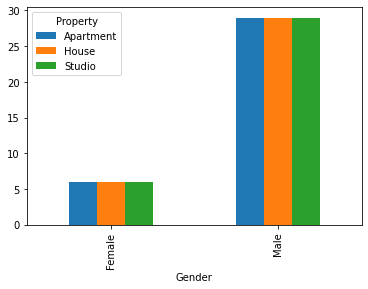

In [36]:
data_bar= pd.DataFrame([['Apartment','Female',6],['House','Female',6],['Studio','Female',6],
                       ['Apartment','Male',29],['House','Male',29],['Studio','Male',29]],columns=['Property','Gender','Jumlah Pengajuan Pinjaman'])

data_bar.pivot("Gender","Property","Jumlah Pengajuan Pinjaman").plot(kind='bar')

plt.show()

<AxesSubplot:xlabel='Property', ylabel='Jumlah Pengajuan Pinjaman'>

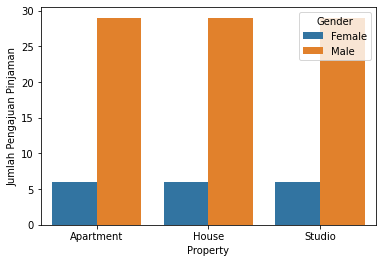

In [37]:
import seaborn as sns
data_bar= pd.DataFrame([['Female','Apartment',6],['Female','House',6],['Female','Studio',6],
                       ['Male','Apartment',29],['Male','House',29],['Male','Studio',29]],columns=['Gender','Property','Jumlah Pengajuan Pinjaman'])
sns.barplot(data=data_bar, x='Property', y='Jumlah Pengajuan Pinjaman', hue='Gender')

In [38]:
#pastikan library Matplotlib sudah ditulis 
df.groupby(['gender'])['property_type_apartment',
 'property_type_house','property_type_studio'].count()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6724\2384193783.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['gender'])['property_type_apartment',


,property_type_apartment,property_type_house,property_type_studio
gender,,,
Female,6,6,6
Male,29,29,29


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


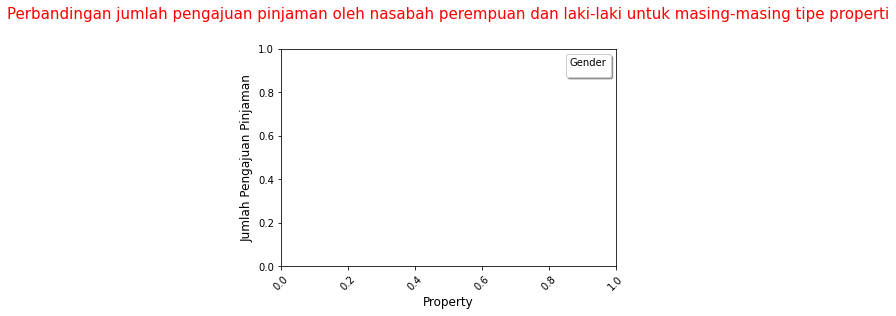

In [39]:
plt.title('Perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti',
         loc='center',pad=30, fontsize=15, color='red')
plt.xlabel('Property', fontsize=12)
plt.ylabel('Jumlah Pengajuan Pinjaman', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Gender')
plt.xticks(rotation=45)
plt.show()